In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [116]:
hl = np.array([
    4.468e9,     #U-238
    0.066,       #Th-234
    0.00076484,  #Pa-234
    245500,      #U-234
    75380,       #Th-230
    1600,        #Ra-226
    0.010475,    #Rn-222
    5.898e-6,    #Po-218
    5.0989e-5,   #Pb-214
    3.78615e-6,  #Bi-214
    5.21e-12,    #Po-214
    22.3,        #Pb-210
    5.015,       #Bi-210
    0.3791,      #Po-210
    #Pb-206 stable
])

In [95]:
hl = hl/1.

In [126]:
def derivs(t, n, hlf):
    k = np.log(2)/hl  # rate constants
    dndt = np.zeros(len(hl)+1)
    
    #set U-238 manually
    dndt[0] = -k[0]*n[0]
    for i in range(1,len(hl)):
        dndt[i] = -k[i]*n[i] + k[i-1]*n[i-1]
    #set Pb-206 manually
    dndt[-1] = k[-2]*n[-2]

    return dndt

In [127]:
k = np.log(2)/hl 

In [128]:
k[-2]

0.13821479173677872

In [129]:
hl[-2]

5.015

In [32]:
# n0 = np.zeros(len(hl)+1)
# n0[0] = 1e14 #10k U-238 atoms
# tstart=0
# tend=1e10  # for 1 year
# teval = np.linspace(0,10,100)
# teval = 10**(teval)

In [117]:
n0 = np.zeros(len(hl)+1)
n0[0] = 10000 #10k U-238 atoms
tstart=0
tend=1e10  # for 1 year
teval = np.linspace(0,tend,1000)
# teval = 10**(teval)

In [120]:
N_out = solve_ivp(derivs,[tstart,tend],n0,method='Radau',t_eval=teval,args=(hl,)).y

In [123]:
k_U238 = np.log(2)/hl[0]
Pb_U_theory = (np.exp(k_U238*teval)-1)

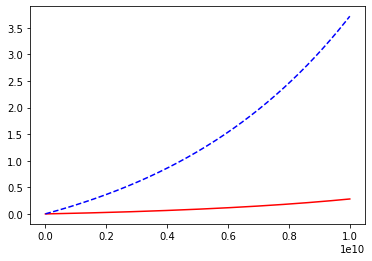

In [124]:
plt.plot(teval[1:],N_out[-1,1:]/N_out[0,1:], 'r-')
plt.plot(teval[1:],Pb_U_theory[1:], 'b--')
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim([0,8e10])
# plt.ylim([0, 1e6])


(0.0, 0.01)

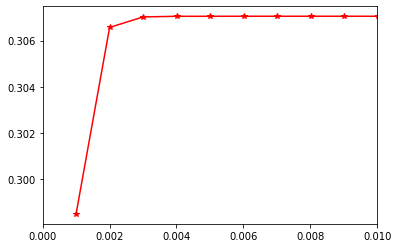

In [111]:
plt.plot(teval[1:],N_out[4,1:]/N_out[3,1:], 'r-*')
plt.xlim([0,0.01])
# plt.ylim([0,0.35])

In [137]:
N_out[0,:]

array([1.00000000e+14, 1.00000000e+14, 1.00000000e+14, 1.00000000e+14,
       1.00000000e+14, 1.00000000e+14, 9.99999999e+13, 9.99999999e+13,
       9.99999999e+13, 9.99999999e+13, 9.99999998e+13, 9.99999998e+13,
       9.99999997e+13, 9.99999997e+13, 9.99999996e+13, 9.99999995e+13,
       9.99999994e+13, 9.99999992e+13, 9.99999990e+13, 9.99999987e+13,
       9.99999984e+13, 9.99999979e+13, 9.99999974e+13, 9.99999967e+13,
       9.99999959e+13, 9.99999948e+13, 9.99999934e+13, 9.99999917e+13,
       9.99999896e+13, 9.99999868e+13, 9.99999834e+13, 9.99999790e+13,
       9.99999735e+13, 9.99999666e+13, 9.99999578e+13, 9.99999468e+13,
       9.99999328e+13, 9.99999153e+13, 9.99998931e+13, 9.99998651e+13,
       9.99998297e+13, 9.99997852e+13, 9.99997289e+13, 9.99996579e+13,
       9.99995683e+13, 9.99994553e+13, 9.99993127e+13, 9.99991327e+13,
       9.99989056e+13, 9.99986190e+13, 9.99982573e+13, 9.99978010e+13,
       9.99972252e+13, 9.99964986e+13, 9.99955818e+13, 9.99944249e+13,
      

In [103]:
N_out[3,:]

array([0.00000000e+00, 6.48305124e-04, 2.79149129e-03, 6.29371658e-03,
       1.10224905e-02, 1.68567061e-02, 2.36730628e-02, 3.13801052e-02,
       3.98932895e-02, 4.91294099e-02, 5.90196890e-02, 6.94765059e-02,
       8.04544971e-02, 9.19082989e-02, 1.03792548e-01, 1.16061880e-01,
       1.28676222e-01, 1.41602896e-01, 1.54791361e-01, 1.68222872e-01,
       1.81878685e-01, 1.95740056e-01, 2.09788239e-01, 2.24004492e-01,
       2.38370069e-01, 2.52866227e-01, 2.67487019e-01, 2.82209498e-01,
       2.97019479e-01, 3.11911351e-01, 3.26879504e-01, 3.41918328e-01,
       3.57022210e-01, 3.72185542e-01, 3.87402711e-01, 4.02668107e-01,
       4.17976119e-01, 4.33321138e-01, 4.48697551e-01, 4.64106901e-01,
       4.79541889e-01, 4.94996902e-01, 5.10470876e-01, 5.25962750e-01,
       5.41471460e-01, 5.56995945e-01, 5.72535142e-01, 5.88087987e-01,
       6.03653420e-01, 6.19230376e-01, 6.34817794e-01, 6.50414612e-01,
       6.66019765e-01, 6.81632193e-01, 6.97250832e-01, 7.12874621e-01,
      

In [155]:
k

array([1.55135895e-10, 1.05022300e+01, 9.06264291e+02, 2.82341010e-06,
       9.19537252e-06, 4.33216988e-04, 6.61715685e+01, 1.17522411e+05,
       1.35940532e+04, 1.83074411e+05, 1.33041685e+11, 3.10828332e-02,
       1.38214792e-01, 1.82840195e+00])